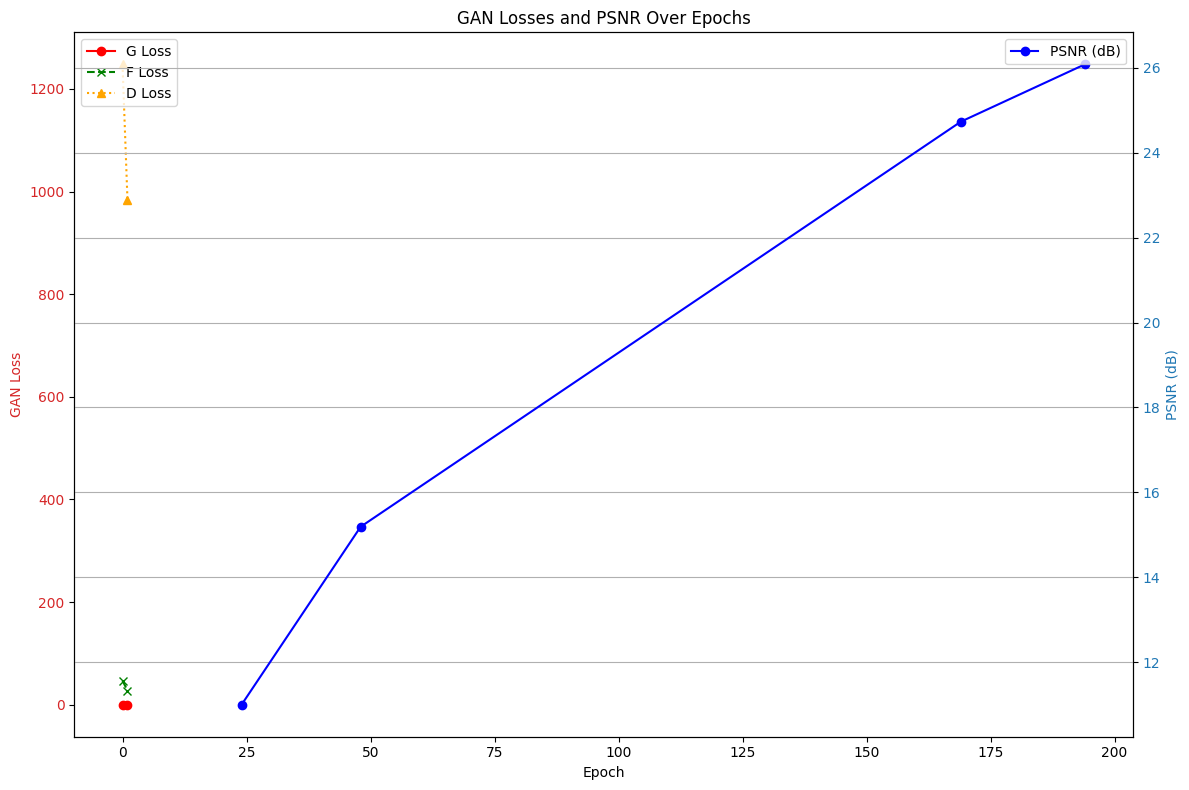

In [1]:
import re
import matplotlib.pyplot as plt

# Log entries to be parsed
logs = """
24-05-01 12:33:55.898 : <epoch:  0, iter:     200, lr:1.000e-03> G_loss: 8.677e-03 F_loss: 4.688e+01 D_loss: 1.248e+03 D_real: -5.158e+04 D_fake: -2.495e+05 
24-05-01 12:40:44.783 : <epoch:  1, iter:     400, lr:1.000e-03> G_loss: 3.437e-03 F_loss: 2.757e+01 D_loss: 9.833e+02 D_real: -5.255e+04 D_fake: -1.967e+05 
24-05-01 15:17:38.281 : <epoch: 24, iter:   5,000, lr:1.000e-03, Average PSNR : 11.00dB
24-05-01 18:08:12.884 : <epoch: 48, iter:  10,000, Average PSNR : 15.19dB
24-05-02 08:20:24.238 : <epoch:169, iter:  35,000, Average PSNR : 24.73dB
24-05-02 11:10:36.328 : <epoch:194, iter:  40,000, Average PSNR : 26.08dB
"""

# Regular expression to extract data from logs
psnr_pattern = r"<epoch:\s*(\d+),\s*iter:\s*(\d+)[^<]*Average PSNR\s*:\s*([\d\.]+)dB"

# Extract PSNR values
matches = re.findall(psnr_pattern, logs)
epochs_psnr = [int(m[0]) for m in matches]
psnr_values = [float(m[2]) for m in matches]

gan_pattern = r"<epoch:\s*(\d+),\s*iter:\s*(\d+)[^>]*> G_loss:\s*([\d\.e\+\-]+)\s*F_loss:\s*([\d\.e\+\-]+)\s*D_loss:\s*([\d\.e\+\-]+)"

# Extract GAN loss values
gan_matches = re.findall(gan_pattern, logs)
epochs_gan = [int(m[0]) for m in gan_matches]
g_losses = [float(m[2]) for m in gan_matches]
f_losses = [float(m[3]) for m in gan_matches]
d_losses = [float(m[4]) for m in gan_matches]

# Creating a combined plot for GAN losses and PSNR

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting GAN losses
ax1.set_xlabel('Epoch')
ax1.set_ylabel('GAN Loss', color='tab:red')
ax1.plot(epochs_gan, g_losses, marker='o', color='r', linestyle='-', label='G Loss')
ax1.plot(epochs_gan, f_losses, marker='x', color='g', linestyle='--', label='F Loss')
ax1.plot(epochs_gan, d_losses, marker='^', color='orange', linestyle=':', label='D Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(loc='upper left')

# Plotting PSNR values on secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('PSNR (dB)', color='tab:blue')
ax2.plot(epochs_psnr, psnr_values, marker='o', color='b', label='PSNR (dB)')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right')

# Adding grid and title
plt.grid(True)
plt.title('GAN Losses and PSNR Over Epochs')
fig.tight_layout()
plt.show()


In [5]:
from cmath import e
import matplotlib.pyplot as plt


epochs = list(range(205))
G_losses = [8.677e-03, 3.437e-03, 1.397e-03, 1.770e-03, 1.073e-03, 1.226e-03, 8.501e-04, 6.261e-04, 5.950e-04, 8.485e-04,
            3.111e-04, 9.087e-04, 5.342e-04, 4.222e-04, 1.295e-03, 3.696e-03, 6.512e-04, 5.410e-04, 7.432e-04, 4.429e-04,
            4.920e-04, 2.699e-04, 4.965e-04, 6.154e-04, 7.178e-04, 6.994e-04, 3.791e-04, 3.342e-03, 6.551e-04, 6.295e-04,
            5.138e-04, 6.655e-04, 4.634e-04, 4.424e-04, 5.505e-04, 3.476e-04, 3.907e-04, 3.819e-04, 3.268e-04, 3.436e-04,
            6.106e-04, 2.514e-04, 2.688e-04, 2.310e-04, 1.439e-04, 2.283e-04, 2.442e-04, 2.895e-04, 2.558e-04, 2.962e-04,
            2.830e-04, 2.259e-04, 2.665e-04, 2.282e-04, 2.322e-04, 3.205e-04, 2.425e-04, 2.326e-04, 3.254e-04, 3.629e-04,
            2.264e-04, 3.053e-04, 3.395e-04, 2.767e-04, 3.298e-04, 2.641e-04, 4.987e-04, 2.652e-04, 3.752e-04, 4.138e-04,
            5.050e-04, 2.848e-04, 3.777e-04, 4.019e-04, 4.595e-04, 3.633e-04, 4.924e-04, 4.384e-04, 4.253e-04, 4.336e-04,
            5.150e-04, 5.132e-04, 6.296e-04, 4.207e-04, 6.640e-04, 5.324e-04, 1.034e-03, 2.920e-03, 9.987e-02, 2.140e-02,
            1.890e-02, 3.495e-04, 3.236e-03, 3.100e-03, 2.584e-03, 1.735e-03, 2.607e-03, 1.474e-03, 1.772e-03, 1.261e-03,
            6.495e-04, 4.581e-04, 3.135e-04, 1.680e-04, 1.094e-04, 7.127e-05, 4.507e-05, 7.016e-05, 6.208e-05, 6.030e-05,
            6.302e-05, 4.489e-05, 4.025e-05, 3.671e-05, 4.386e-05, 1.419e-04, 4.726e-05, 4.816e-05, 9.083e-04, 8.754e-05,
            1.672e-04, 1.250e-04, 5.975e-05, 4.474e-05, 3.715e-05, 6.661e-05, 4.860e-05, 5.344e-05, 5.086e-05, 4.359e-05,
            2.815e-05, 4.875e-05, 3.133e-05, 4.287e-05, 3.111e-05, 4.992e-05, 3.531e-05, 2.826e-05, 4.004e-05, 3.161e-05,
            5.759e-05, 4.053e-05, 3.623e-05, 4.601e-05, 5.101e-05, 6.706e-05, 9.810e-05, 5.380e-05, 3.376e-05, 5.812e-05,
            5.222e-05, 5.747e-05, 5.362e-04, 2.851e-05, 4.165e-05, 8.852e-05, 1.002e-04, 8.062e-05, 2.582e-05, 4.739e-05,
            5.800e-05, 8.860e-05, 4.715e-05, 7.018e-05, 2.686e-05, 3.445e-05, 9.614e-05, 1.083e-04, 8.445e-05, 1.246e-04,
            4.934e-05, 5.361e-05, 2.959e-04, 6.030e-05, 5.063e-05, 6.921e-05, 3.306e-05, 1.144e-04, 2.030e-05, 3.417e-04,
            3.520e-05, 2.909e-05]

F_losses = [4.688e+01, 2.757e+01, 1.204e+01, 7.502e+00, 7.239e+00, 8.704e+00, 5.985e+00, 6.411e+00, 6.803e+00, 7.313e+00,
            6.836e+00, 7.117e+00, 5.873e+00, 4.463e+00, 8.593e+00, 7.587e+00, 5.079e+00, 6.002e+00, 6.417e+00, 5.817e+00,
            6.912e+00, 6.959e+00, 5.851e+00, 6.498e+00, 5.880e+00, 5.159e+00, 5.776e+00, 8.909e+00, 7.936e+00, 7.096e+00,
            5.614e+00, 6.198e+00, 5.141e+00, 5.263e+00, 6.601e+00, 8.427e+00, 6.810e+00, 6.321e+00, 7.354e+00, 6.682e+00,
            8.083e+00, 6.467e+00, 5.990e+00, 7.307e+00, 4.951e+00, 6.086e+00, 5.804e+00, 7.339e+00, 6.418e+00, 5.738e+00,
            5.763e+00, 6.933e+00, 4.763e+00, 4.526e+00, 7.731e+00, 4.991e+00, 4.906e+00, 3.581e+00, 4.807e+00, 3.773e+00, 4.044e+00,
             6.227e+00, 3.659e+00, 5.449e+00, 5.264e+00, 5.652e+00, 6.346e+00, 6.464e+00, 4.539e+00, 3.918e+00, 5.217e+00,
             5.407e+00, 7.995e+00, 5.998e+00, 9.383e+01, 7.914e+00, 8.014e+00, 7.608e+00, 7.251e+00, 6.045e+00, 5.488e+00,
             4.656e+00, 6.406e+00, 4.777e+00, 4.351e+00, 5.463e+00, 2.460e+00, 3.792e+00, 3.617e+00, 3.348e+00, 3.503e+00,
             3.806e+00, 3.861e+00, 3.764e+00, 4.202e+00, 3.718e+00, 4.153e+00, 3.816e+00, 2.910e+00, 2.975e+00, 3.362e+00,
             3.573e+00, 3.242e+00, 3.075e+00, 4.430e+00, 5.447e+00, 2.648e+00, 3.392e+00, 2.576e+00, 3.044e+00, 2.825e+00,
             2.617e+00, 4.385e+00, 2.066e+00, 3.815e+00, 3.383e+00, 2.762e+00, 3.952e+00, 2.997e+00, 3.908e+00, 2.281e+00,
             3.266e+00, 2.779e+00, 2.342e+00, 3.727e+00, 2.481e+00, 3.731e+00, 3.476e+00, 3.453e+00, 3.487e+00, 2.793e+00,
             2.585e+00, 2.990e+00, 2.461e+00, 3.412e+00, 3.208e+00, 3.688e+00, 2.339e+00, 2.366e+00, 2.051e+00, 3.394e+00,
             2.916e+00, 2.643e+00, 2.857e+00, 3.663e+00, 2.938e+00, 3.320e+00, 2.397e+00, 2.563e+00, 2.859e+00, 3.602e+00,
             3.073e+00, 2.988e+00, 2.511e+00, 2.315e+00, 2.678e+00, 2.992e+00, 2.572e+00, 2.354e+00, 2.464e+00, 2.781e+00,
             2.015e+00, 3.387e+00, 2.594e+00, 2.286e+00]

D_losses = [1.248e+03, 9.833e+02, 7.980e+02, 8.198e+02, 7.470e+02, 7.264e+02, 8.900e+02, 4.832e+02, 2.812e+02, 2.479e+02,
            1.661e+02, 3.510e+02, 6.841e+02, 3.734e+02, 5.705e+02, 1.427e+01, 1.177e+00, 7.353e-01, 6.791e-01, 6.077e-01,
            5.672e-01, 7.991e-01, 7.800e-01, 9.279e-01, 1.454e+00, 2.197e+00, 1.954e+01, 1.539e+03, 9.001e+02, 7.123e+02,
            5.549e+02, 5.358e+02, 3.732e+02, 4.592e+02, 4.497e+02, 4.227e+02, 4.464e+02, 4.025e+02, 4.483e+02, 4.718e+02,
            3.954e+02, 2.445e-01, -7.838e-03, -2.639e-02, -2.209e-02, -2.252e-02, -2.578e-02, -3.173e-02, -2.869e-02, -3.188e-02,
            -3.197e-02, -2.338e-02, -3.180e-02, -3.163e-02, -3.222e-02, -3.146e-02, -3.415e-02, -3.351e-02, -3.368e-02, -3.380e-02,
            -3.381e-02, -3.198e-02, -3.405e-02, -3.303e-02, -3.390e-02, -3.369e-02, -3.206e-02, -3.492e-02, -3.413e-02, -3.161e-02,
            -3.047e-02, -3.327e-02, -2.927e-02, -3.313e-02, -3.321e-02, -2.714e-02, -3.080e-02, -2.780e-02, -2.926e-02, -2.764e-02,
            -2.633e-02, -2.332e-02, -8.527e-03, -2.203e-02, -2.385e-02, -1.392e-02, -1.077e-02, 8.793e+02, 7.406e-02, 9.737e+00,
            -4.182e-01, 3.624e+02, -8.885e-01, -7.904e-01, -7.450e-01, -7.027e-01, -6.362e-01, -6.196e-01, -6.107e-01, -6.252e-01,
            -6.397e-01, -6.670e-01, -7.050e-01, -7.397e-01, -8.510e-01, -7.816e-01, -6.789e-01, -6.363e-01, -4.000e-01, -3.731e-01,
            -3.351e-01, -3.331e-01, -3.603e-01, -4.184e-01, -3.462e-01, -3.392e-01, -3.458e-01, -2.689e-01, -9.197e-01, -7.600e-01,
            -3.856e-01, -2.818e-01, -2.767e-01, -2.906e-01, -2.558e-01, -2.309e-01, -2.233e-01, -2.060e-01, -2.046e-01, -1.809e-01,
            -2.066e-01, -3.138e-01, -2.151e-01, -2.425e-01, -2.364e-01, -2.945e-01, -2.813e-01, 4.053e-05, 3.623e-05, 4.601e-05, 5.101e-05,
             6.706e-05, 9.810e-05, 5.380e-05, 3.376e-05, 5.812e-05,
            5.222e-05, 5.747e-05, 5.362e-04, 2.851e-05, 4.165e-05, 8.852e-05, 1.002e-04, 8.062e-05, 2.582e-05, 4.739e-05,
            5.800e-05, 8.860e-05, 4.715e-05, 7.018e-05, 2.686e-05, 3.445e-05, 9.614e+02]


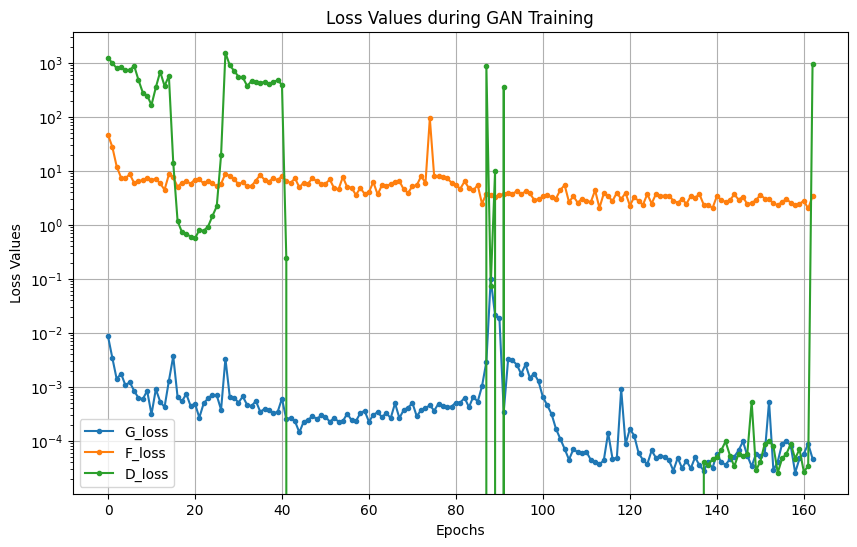

In [6]:
max_epochs = min(len(G_losses), len(F_losses), len(D_losses))
G_losses = G_losses[:max_epochs]
F_losses = F_losses[:max_epochs]
D_losses = D_losses[:max_epochs]
epochs = list(range(max_epochs))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(epochs, G_losses, label='G_loss', marker='o', markersize=3)
plt.plot(epochs, F_losses, label='F_loss', marker='o', markersize=3)
plt.plot(epochs, D_losses, label='D_loss', marker='o', markersize=3)
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.yscale('log')
plt.legend()
plt.title('Loss Values during GAN Training')
plt.grid(True)
plt.show()

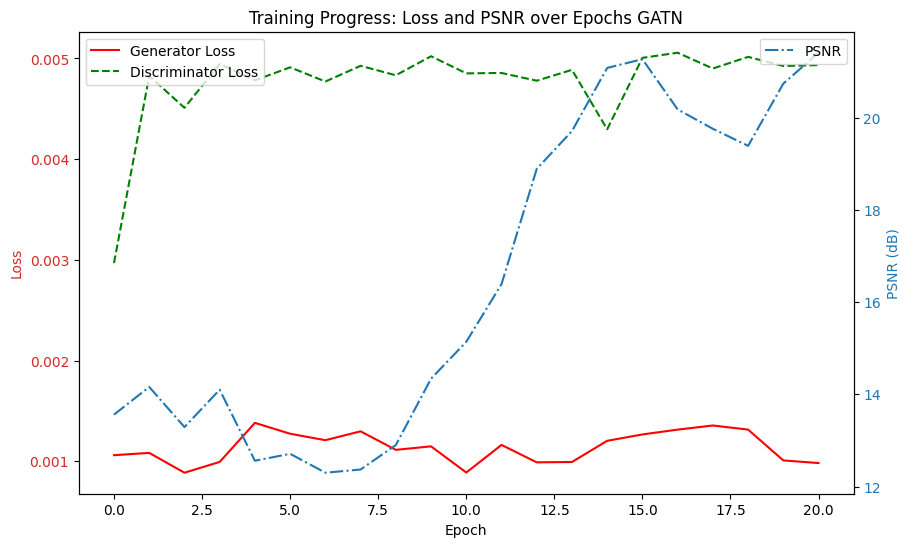

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data based on the previously provided logs
data = {
    "Epoch": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Generator Loss": [1.061e-03, 1.084e-03, 8.870e-04, 9.943e-04, 1.382e-03, 1.274e-03, 1.210e-03,
                       1.298e-03, 1.114e-03, 1.149e-03, 8.888e-04, 1.163e-03, 9.901e-04, 9.934e-04,
                       1.204e-03, 1.267e-03, 1.315e-03, 1.356e-03, 1.315e-03, 1.009e-03, 9.831e-04],
    "Discriminator Loss": [2.969e-03, 4.827e-03, 4.510e-03, 4.946e-03, 4.783e-03, 4.912e-03, 4.771e-03,
                           4.927e-03, 4.833e-03, 5.022e-03, 4.852e-03, 4.856e-03, 4.779e-03, 4.887e-03,
                           4.297e-03, 5.006e-03, 5.057e-03, 4.900e-03, 5.016e-03, 4.925e-03, 4.934e-03],
    "PSNR": [13.56, 14.16, 13.29, 14.10, 12.56, 12.71, 12.30, 12.37, 12.90, 14.34, 15.14, 16.39,
             18.89, 19.71, 21.08, 21.27, 20.18, 19.76, 19.39, 20.74, 21.41]  # Sample PSNR data
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(df['Epoch'], df['Generator Loss'], label='Generator Loss', color='red')
ax1.plot(df['Epoch'], df['Discriminator Loss'], label='Discriminator Loss', color='green', linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('PSNR (dB)', color=color)
ax2.plot(df['Epoch'], df['PSNR'], label='PSNR', color=color, linestyle='-.')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Training Progress: Loss and PSNR over Epochs GATN')
plt.show()


In [18]:
import torch
import torch.nn.functional as F

# Assume img is your input image tensor of shape [1, Channels, Height, Width]
# Let's create a random image tensor for demonstration
channels, height, width = 3, 128, 128  # Example dimensions
img = torch.randn(1, channels, height, width)

block_size = 16
stride = 8  # 50% overlap

# Step 1: Divide into overlapping blocks
unfolded = F.unfold(img, kernel_size=block_size, stride=stride)

# Step 2: Manipulate blocks (if needed, you can process your blocks here)

# Step 3: Reconstruct the image
# Reconstructing the image
reconstructed = F.fold(unfolded, output_size=(height, width), kernel_size=block_size, stride=stride)

# Correction factor for overlapping patches
# Create a ones tensor of the same shape as img
one_tensor = torch.ones_like(img)
unfolded_ones = F.unfold(one_tensor, kernel_size=block_size, stride=stride)
corrected_ones = F.fold(unfolded_ones, output_size=(height, width), kernel_size=block_size, stride=stride)

# Normalize the reconstructed image by the correction tensor
reconstructed /= corrected_ones

# Check if the reconstruction is perfect
print("Reconstruction error (should be close to 0):", torch.norm(img - reconstructed).item())


Reconstruction error (should be close to 0): 0.0


Reconstruction error (should be close to 0): 0.0


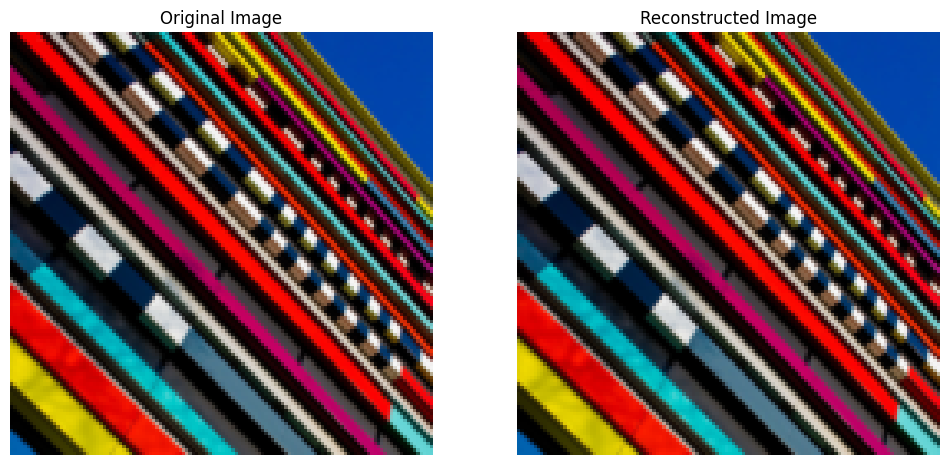

In [19]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load and transform image
image_path = '/home/ozkan/works/n-smoe/utils/test.png'
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
img = transform(image).unsqueeze(0)

# Image processing parameters
channels, height, width = 3, 128, 128
block_size = 16
stride = 8

# Divide into overlapping blocks
unfolded = F.unfold(img, kernel_size=block_size, stride=stride)

# Reconstruct the image
reconstructed = F.fold(unfolded, output_size=(height, width), kernel_size=block_size, stride=stride)

# Correction for overlapping patches
one_tensor = torch.ones_like(img)
unfolded_ones = F.unfold(one_tensor, kernel_size=block_size, stride=stride)
corrected_ones = F.fold(unfolded_ones, output_size=(height, width), kernel_size=block_size, stride=stride)
reconstructed /= corrected_ones

# Verify reconstruction
print("Reconstruction error (should be close to 0):", torch.norm(img - reconstructed).item())

# Plot the original and reconstructed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(transforms.ToPILImage()(img.squeeze(0)))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transforms.ToPILImage()(reconstructed.squeeze(0)))
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')

plt.show()


In [20]:
unfolded.shape

torch.Size([1, 768, 225])

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
# GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import cuda_block_ops

# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path)
    transform = transforms.ToTensor()
    return transform(image).to(device)  # Move tensor to GPU

# Extract overlapping blocks
def extract_blocks(img_tensor, block_size, overlap):
    blocks = []
    step = block_size - overlap
    for i in range(0, img_tensor.shape[1] - block_size + 1, step):
        for j in range(0, img_tensor.shape[2] - block_size + 1, step):
            block = img_tensor[:, i:i+block_size, j:j+block_size]
            blocks.append(block)
    return torch.stack(blocks).to(device)  # Stack and move blocks to GPU

# Reconstruct the image from blocks
def reconstruct_image(blocks, original_dims, block_size, overlap):
    height, width = original_dims
    step = block_size - overlap
    recon_image = torch.zeros(3, height, width).to(device)
    count_matrix = torch.zeros(3, height, width).to(device)

    idx = 0
    for i in range(0, height - block_size + 1, step):
        for j in range(0, width - block_size + 1, step):
            recon_image[:, i:i+block_size, j:j+block_size] += blocks[idx]
            count_matrix[:, i:i+block_size, j:j+block_size] += 1
            idx += 1

    recon_image /= count_matrix
    return recon_image


image_path = '/home/ozkan/works/n-smoe/utils/test.png'
image_tensor = load_image(image_path)
blocks =  cuda_block_ops.extract_blocks(image_tensor, 16, 1) # extract_blocks(image_tensor, 16, 1)
# reconstructed_image = cuda_block_ops.extract_blocks(blocks, image_tensor.shape[1:], 16, 1) # reconstruct_image(blocks, image_tensor.shape[1:], 16, 1)

ModuleNotFoundError: No module named 'cuda_block_ops'

/home/ozkan/miniconda3/envs/venv11/lib/python3.11/site-packages/torchvision/transforms/functional.py:282: RuntimeWarning: invalid value encountered in cast
  npimg = (npimg * 255).astype(np.uint8)


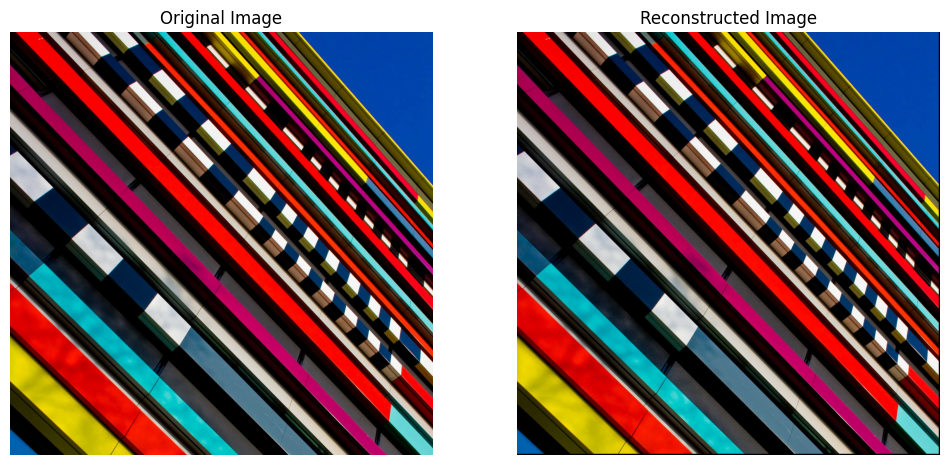

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(transforms.ToPILImage()(image_tensor.squeeze(0)))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transforms.ToPILImage()(reconstructed_image.squeeze(0)))
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')

plt.show()

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import functools
from typing import TypeVar, Generic, Literal, TypedDict
from dataclasses import dataclass

class BatchedViews(TypedDict):
    image: torch.FloatTensor  # Shape: [batch, channels, height, width]

T = TypeVar('T')

class Backbone(nn.Module, Generic[T]):
    def __init__(self, cfg: T):
        super().__init__()
        self.cfg = cfg

    def forward(self, context: BatchedViews) -> torch.FloatTensor:
        raise NotImplementedError

    @property
    def d_out(self) -> int:
        raise NotImplementedError

@dataclass
class BackboneResnetCfg:
    name: Literal["resnet"]
    model: Literal["resnet18", "resnet34", "resnet50", "resnet101", "resnet152", "dino_resnet50"]
    num_layers: int
    use_first_pool: bool
    d_out: int

class BackboneResnet(Backbone[BackboneResnetCfg]):
    def __init__(self, cfg: BackboneResnetCfg):
        super().__init__(cfg)
        norm_layer = functools.partial(nn.InstanceNorm2d, affine=False, track_running_stats=False)
        model = getattr(torchvision.models, cfg.model)(pretrained=False, norm_layer=norm_layer)
        # Remove the last fully connected layer and average pooling layer
        self.model = nn.Sequential(*list(model.children())[:-2])
        
        self.projections = nn.ModuleDict()
        out_channels = self.model[-1][-1].conv3.out_channels if hasattr(self.model[-1][-1], 'conv3') else 256
        for index in range(cfg.num_layers):
            self.projections[f'layer{index}'] = nn.Conv2d(out_channels, cfg.d_out, 1)

    def forward(self, context: BatchedViews) -> torch.FloatTensor:
        x = context['image']
        x = self.model(x)
        features = [self.projections[f'layer{index}'](x) for index in range(self.cfg.num_layers)]
        output = torch.stack(features).sum(dim=0)
        return output

    @property
    def d_out(self) -> int:
        return self.cfg.d_out

cfg = BackboneResnetCfg('resnet', 'resnet50', 5, False, 256)
model = BackboneResnet(cfg)
dummy_data = torch.rand(3, 3, 224, 224)  # Batch size of 3, 3 channels, 224x224 each
context = BatchedViews(image=dummy_data)
output = model(context)
print(f'Output shape: {output.shape}')


Output shape: torch.Size([3, 256, 7, 7])


In [23]:
import functools
from dataclasses import dataclass
from typing import Literal

import torch
import torch.nn.functional as F
import torchvision
from einops import rearrange
from jaxtyping import Float
from torch import Tensor, nn
from torchvision.models import ResNet

from typing import Callable, Literal, TypedDict

from jaxtyping import Float, Int64
from torch import Tensor

from abc import ABC, abstractmethod
from typing import Generic, TypeVar


class BatchedViews(TypedDict, total=False):
    extrinsics: Float[Tensor, "batch _ 4 4"]  # batch view 4 4
    intrinsics: Float[Tensor, "batch _ 3 3"]  # batch view 3 3
    image: Float[Tensor, "batch _ _ _ _"]  # batch view channel height width
    near: Float[Tensor, "batch _"]  # batch view
    far: Float[Tensor, "batch _"]  # batch view
    index: Int64[Tensor, "batch _"]  # batch view

T = TypeVar("T")


class Backbone(nn.Module, ABC, Generic[T]):
    cfg: T

    def __init__(self, cfg: T) -> None:
        super().__init__()
        self.cfg = cfg

    @abstractmethod
    def forward(
        self,
        context: BatchedViews,
    ) -> Float[Tensor, "batch view d_out height width"]:
        pass

    @property
    @abstractmethod
    def d_out(self) -> int:
        pass



@dataclass
class BackboneResnetCfg:
    name: Literal["resnet"]
    model: Literal[
        "resnet18", "resnet34", "resnet50", "resnet101", "resnet152", "dino_resnet50"
    ]
    num_layers: int
    use_first_pool: bool
    d_out: int


class BackboneResnet(Backbone[BackboneResnetCfg]):
    model: ResNet

    def __init__(self, cfg: BackboneResnetCfg, d_in: int) -> None:
        super().__init__(cfg)

        assert d_in == 3

        norm_layer = functools.partial(
            nn.InstanceNorm2d,
            affine=False,
            track_running_stats=False,
        )

        if cfg.model == "dino_resnet50":
            self.model = torch.hub.load("facebookresearch/dino:main", "dino_resnet50")
        else:
            self.model = getattr(torchvision.models, cfg.model)(norm_layer=norm_layer)

        # Set up projections
        self.projections = nn.ModuleDict({})
        for index in range(1, cfg.num_layers):
            key = f"layer{index}"
            block = getattr(self.model, key)
            conv_index = 1
            try:
                while True:
                    d_layer_out = getattr(block[-1], f"conv{conv_index}").out_channels
                    conv_index += 1
            except AttributeError:
                pass
            self.projections[key] = nn.Conv2d(d_layer_out, cfg.d_out, 1)

        # Add a projection for the first layer.
        self.projections["layer0"] = nn.Conv2d(
            self.model.conv1.out_channels, cfg.d_out, 1
        )

    def forward(
        self,
        context: BatchedViews,
    ) -> Float[Tensor, "batch view d_out height width"]:
        # Merge the batch dimensions.
        b, v, _, h, w = context["image"].shape
        x = rearrange(context["image"], "b v c h w -> (b v) c h w")

        # Run the images through the resnet.
        x = self.model.conv1(x)
        x = self.model.bn1(x)
        x = self.model.relu(x)
        features = [self.projections["layer0"](x)]

        # Propagate the input through the resnet's layers.
        for index in range(1, self.cfg.num_layers):
            key = f"layer{index}"
            if index == 0 and self.cfg.use_first_pool:
                x = self.model.maxpool(x)
            x = getattr(self.model, key)(x)
            features.append(self.projections[key](x))

        # Upscale the features.
        features = [
            F.interpolate(f, (h, w), mode="bilinear", align_corners=True)
            for f in features
        ]
        features = torch.stack(features).sum(dim=0)

        # Separate batch dimensions.
        return rearrange(features, "(b v) c h w -> b v c h w", b=b, v=v)

    @property
    def d_out(self) -> int:
        return self.cfg.d_out


In [29]:
import unittest
import torch
from torchvision.models import resnet50

class TestBackboneResnet(unittest.TestCase):
    def setUp(self):
        
        self.config = BackboneResnetCfg(
            name="resnet",
            model="resnet50",
            num_layers=3,
            use_first_pool=True,
            d_out=10
        )
        self.model = BackboneResnet(self.config, d_in=3)
        self.input_tensor = torch.randn(2, 1, 3, 224, 224)
        self.context = BatchedViews(image=self.input_tensor)

    def test_forward_pass(self):
       
        output = self.model(self.context)

       
        expected_shape = (2, 1, self.config.d_out, 224, 224)
        self.assertEqual(output.shape, expected_shape, "The output shape should match the expected shape")

     
        self.assertEqual(output.dtype, torch.float32, "Output tensor should have float32 data type")


In [30]:
unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.630s

OK


In [33]:
import functools
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from dataclasses import dataclass
from typing import TypeVar, Generic, Literal, TypedDict

class BatchedViews(TypedDict):
    image: torch.Tensor

T = TypeVar("T")

class Backbone(nn.Module, Generic[T]):
    def __init__(self, cfg: T):
        super().__init__()
        self.cfg = cfg

    def forward(self, context: BatchedViews) -> torch.Tensor:
        raise NotImplementedError

    @property
    def d_out(self) -> int:
        raise NotImplementedError

@dataclass
class BackboneResnetCfg:
    name: Literal["resnet"]
    model: Literal["resnet18", "resnet34", "resnet50", "resnet101", "resnet152", "dino_resnet50"]
    num_layers: int
    use_first_pool: bool
    d_out: int

class BackboneResnet(Backbone[BackboneResnetCfg]):
    def __init__(self, cfg: BackboneResnetCfg, d_in: int):
        super().__init__(cfg)
        assert d_in == 3, "Input depth should be 3 for RGB images"
        
        norm_layer = functools.partial(nn.InstanceNorm2d, affine=False, track_running_stats=False)
        self.model = getattr(torchvision.models, cfg.model)(pretrained=False, norm_layer=norm_layer)

        self.projections = nn.ModuleDict()
        previous_output_channels = self.model.conv1.out_channels  
        self.projections['layer0'] = nn.Conv2d(previous_output_channels, cfg.d_out, 1)

        layers = [self.model.layer1, self.model.layer2, self.model.layer3, self.model.layer4]
        for i, layer_group in enumerate(layers[:cfg.num_layers - 1]):
            
            output_channels = layer_group[-1].conv3.out_channels
            self.projections[f'layer{i+1}'] = nn.Conv2d(output_channels, cfg.d_out, 1)

    def forward(self, context: BatchedViews) -> torch.Tensor:
        x = context['image']
        x = self.model.conv1(x)
        x = self.model.bn1(x)
        x = self.model.relu(x)
        
        features = [self.projections['layer0'](x)]
        layers = [self.model.layer1, self.model.layer2, self.model.layer3, self.model.layer4]
        for index in range(1, self.cfg.num_layers):
            x = layers[index - 1](x)
            features.append(self.projections[f'layer{index}'](x))
        
        h, w = context['image'].shape[2:]
        features = [F.interpolate(feature, (h, w), mode='bilinear', align_corners=True) for feature in features]
        output = torch.stack(features).sum(dim=0)
        return output

    @property
    def d_out(self) -> int:
        return self.cfg.d_out



In [34]:
config = BackboneResnetCfg(
name="resnet",
model="resnet50", # Use resnet50 as an example model
num_layers=4, # Number of layers to use in projections
use_first_pool=True,
d_out=10 # Number of output channels
)



# Initialize the BackboneResnet model
model = BackboneResnet(config, d_in=3)

# Create a dummy BatchedViews with random data
dummy_data = torch.randn(3, 3, 224, 224)  # Simulate 3 batches, 3 color channels, 224x224 image size
context = BatchedViews(image=dummy_data)

# Perform the forward pass
output = model(context)
print("Output shape:", output.shape) 

Output shape: torch.Size([3, 10, 224, 224])


In [1]:
import torch

x = torch.tensor([1000.0, 1001.0, 999.0])
e_direct = torch.exp(x)
sum_e_direct = torch.sum(e_direct)
log_sum_exp_e = torch.log(sum_e_direct)

# Using log-sum-exp trick
max_x = torch.max(x)
log_sum_exp_trick = max_x + torch.log(torch.sum(torch.exp(x - max_x)))

print("Direct Log-Sum-Exp:", log_sum_exp_e)
print("Log-Sum-Exp Trick:", log_sum_exp_trick)


Direct Log-Sum-Exp: tensor(inf)
Log-Sum-Exp Trick: tensor(1001.4076)


In [1]:
import math
from dataclasses import dataclass
from typing import Generic, Optional, TypeVar

import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange
from utils_n.nn import avg_pool_nd, checkpoint, conv_nd, zero_module, GroupNorm32

def normalization(channels, groups):
    return nn.GroupNorm(groups, channels)

T = TypeVar("T")

class Backbone(nn.Module, Generic[T]):
    def __init__(self, cfg: T):
        super().__init__()
        self.cfg = cfg

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        raise NotImplementedError

    @property
    def d_out(self) -> int:
        raise NotImplementedError


In [3]:
@dataclass
class AttentionBlockConfig:
    channels: int = 3
    num_heads: int = 1
    num_head_channels: int = -1
    use_checkpoint: bool = False
    use_new_attention_order: bool = False
    use_self_attention: bool = False
    num_groups: int = 32

class AttentionBlock(Backbone[AttentionBlockConfig]):
    def __init__(self, cfg: AttentionBlockConfig):
        super().__init__(cfg)
        if cfg.num_head_channels == -1:
            self.num_heads = cfg.num_heads
        else:
            assert (
                cfg.channels % cfg.num_head_channels == 0
            ), f"q,k,v channels {cfg.channels} is not divisible by num_head_channels {cfg.num_head_channels}"
            self.num_heads = cfg.channels // cfg.num_head_channels

        self.norm = normalization(cfg.channels, cfg.num_groups)
        self.qkv = conv_nd(1, cfg.channels, cfg.channels * 3, 1)

        if cfg.use_self_attention:
            self.attention = SelfAttention(cfg.channels, self.num_heads)
        elif cfg.use_new_attention_order:
            self.attention = QKVAttention(self.num_heads)
        else:
            self.attention = QKVAttentionLegacy(self.num_heads)

        self.proj_out = zero_module(conv_nd(1, cfg.channels, cfg.channels, 1))

    def forward(self, x):
        return checkpoint(self._forward, (x,), self.parameters(), self.cfg.use_checkpoint)

    def _forward(self, x):
        b, c, *spatial = x.shape
        x = x.reshape(b, c, -1)
        qkv = self.qkv(self.norm(x))
        if self.cfg.use_self_attention:
            qkv = qkv.permute(0, 2, 1)  # B, C, N to B, N, C for SelfAttention
            h = self.attention(qkv)
            h = h.permute(0, 2, 1)  # B, N, C back to B, C, N
        else:
            h = self.attention(qkv)
        h = self.proj_out(h)
        return (x + h).reshape(b, c, *spatial)

class QKVAttentionLegacy(nn.Module):
    def __init__(self, n_heads):
        super().__init__()
        self.n_heads = n_heads

    def forward(self, qkv):
        bs, width, length = qkv.shape
        assert width % (3 * self.n_heads) == 0
        ch = width // (3 * self.n_heads)
        q, k, v = qkv.reshape(bs * self.n_heads, ch * 3, length).split(ch, dim=1)
        scale = 1 / math.sqrt(math.sqrt(ch))
        weight = torch.einsum(
            "bct,bcs->bts", q * scale, k * scale
        )
        weight = torch.softmax(weight.float(), dim=-1).type(weight.dtype)
        a = torch.einsum("bts,bcs->bct", weight, v)
        return a.reshape(bs, -1, length)

class QKVAttention(nn.Module):
    def __init__(self, n_heads):
        super().__init__()
        self.n_heads = n_heads

    def forward(self, qkv):
        bs, width, length = qkv.shape
        assert width % (3 * self.n_heads) == 0
        ch = width // (3 * self.n_heads)
        q, k, v = qkv.chunk(3, dim=1)
        scale = 1 / math.sqrt(math.sqrt(ch))
        weight = torch.einsum(
            "bct,bcs->bts",
            (q * scale).view(bs * self.n_heads, ch, length),
            (k * scale).view(bs * self.n_heads, ch, length),
        )
        weight = torch.softmax(weight.float(), dim=-1).type(weight.dtype)
        a = torch.einsum(
            "bts,bcs->bct", weight, v.reshape(bs * self.n_heads, ch, length)
        )
        return a.reshape(bs, -1, length)

class SelfAttention(nn.Module):
    def __init__(self, dim, num_heads=8, dropout=0.1):
        super().__init__()
        self.num_heads = num_heads
        self.scale = dim ** -0.5

        self.qkv = nn.Linear(dim, dim * 3, bias=False)
        self.attn_drop = nn.Dropout(dropout)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(dropout)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).chunk(3, dim=-1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=self.num_heads), qkv)

        dots = (q @ k.transpose(-2, -1)) * self.scale
        attn = dots.softmax(dim=-1)
        attn = self.attn_drop(attn)

        out = (attn @ v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        out = self.proj(out)
        out = self.proj_drop(out)
        return out

In [4]:
cfg = AttentionBlockConfig(
    channels=64,
    num_heads=4,
    num_head_channels=16,
    use_checkpoint=True,
    use_self_attention=True,
    num_groups=32
)

attention_block = AttentionBlock(cfg)

# Create a dummy input tensor
input_tensor = torch.randn(2, 64, 32, 32)  # Batch size of 2, 64 channels, 32x32 spatial dimensions

# Forward pass
output_tensor = attention_block(input_tensor)
print(output_tensor.shape)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2048x192 and 64x192)